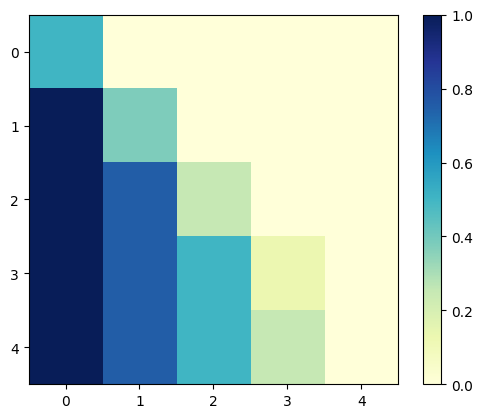

In [1]:
# initialize the reward matrix
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)
num_states = 5
num_actions = 5 #0 producing highest quantity
action2bid = np.linspace(0,1,num_actions)
reward = np.zeros((num_actions, num_actions))
for i in range(reward.shape[0]):
    for j in range(reward.shape[1]):
      if i>j: 
        reward[i, j] += 1-action2bid[j]
      elif i==j:
        reward[i, j] += (1-action2bid[i])/2
      else:
        reward[i, j] += 0

# Plot heatmap
plt.imshow(reward, cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.show()

In [2]:
import random
import numpy as np

# initialize parameters
gamma = 0.9
alpha = 0.1
initial_eps = 1.0
eps_decay = 0.99999
min_eps = 0.001
eps = initial_eps

# initialize the Q-table
Q1_period1 = np.ones((num_actions,num_actions))
Q1_period2 = np.ones((num_actions,num_actions,num_actions))
Q2_period1 = np.ones((num_actions,num_actions))
Q2_period2 = np.ones((num_actions,num_actions,num_actions))
winning_bid_history = []

In [3]:
# initialize the state
num_episodes = 500000
max_bid_agent1 = 0
max_bid_agent2 = 0
for episode in range(num_episodes):

    # ------ Period 1 ------
    # take the action according to exploratory policy
    if np.random.uniform()>eps:
        agent1_action1 = np.argmax(Q1_period1[max_bid_agent2])
    else:
        agent1_action1 = np.random.choice(range(num_actions))
        
    # take the action according to exploratory policy
    if np.random.uniform()>eps:
        agent2_action1 = np.argmax(Q2_period1[max_bid_agent1])
    else:
        agent2_action1 = np.random.choice(range(num_actions))
        
    # observe each others' states
    agent1_state = agent2_action1
    agent2_state = agent1_action1
    
    # ------ Period 2 ------
    # take the action according to exploratory policy
    if np.random.uniform()>eps:
        agent1_action2 = np.argmax(Q1_period2[max_bid_agent2,agent1_state])
    else:
        agent1_action2 = np.random.choice(range(num_actions))
      
    # take the action according to exploratory policy
    if np.random.uniform()>eps:
        agent2_action2 = np.argmax(Q2_period2[max_bid_agent1,agent2_state])
    else:
        agent2_action2 = np.random.choice(range(num_actions))
         
    # collect rewards
    agent1_final_reward = reward[max(agent1_action1,agent1_action2), max(agent2_action1,agent2_action2)]
    agent2_final_reward = reward[max(agent2_action1,agent2_action2), max(agent1_action1,agent1_action2)]

     # ------ Update Step ------
   
    # agent 1 Q-values
    Q1_period1[max_bid_agent2,agent1_action1] =  (1-alpha)*Q1_period1[max_bid_agent2,agent1_action1] + alpha * (agent1_final_reward + gamma * np.max(Q1_period1[max_bid_agent2]))
    Q1_period2[max_bid_agent2,agent1_state,agent1_action2] =  (1-alpha)*Q1_period2[max_bid_agent2,agent1_state,agent1_action2] + alpha * (agent1_final_reward + gamma * np.max(Q1_period2[max_bid_agent2,agent1_state]))

    # agent 2 Q-values
    Q2_period1[max_bid_agent1,agent2_action1] =  (1-alpha)*Q2_period1[max_bid_agent1,agent2_action1] + alpha * (agent2_final_reward + gamma * np.max(Q2_period1[max_bid_agent1]))
    Q2_period2[max_bid_agent1,agent2_state,agent2_action2] =  (1-alpha)*Q2_period2[max_bid_agent1,agent2_state,agent2_action2] + alpha * (agent2_final_reward + gamma * np.max(Q2_period2[max_bid_agent1,agent2_state]))

    # update epsilon
    eps = max(min_eps, eps * eps_decay)

    # max bid's last game
    winning_bid = max(agent1_action1,agent1_action2,agent2_action1,agent2_action2)
    max_bid_agent1 = max(agent1_action1,agent1_action2)
    max_bid_agent2 = max(agent2_action1,agent2_action2)
    
    # print results
    if episode%10000==0:
      print('\n',episode, eps)

    # store history
    winning_bid_history.append(winning_bid)


 0 0.99999

 10000 0.9048279172450976

 20000 0.81872174704358

 30000 0.7408097012777304

 40000 0.6703120022021174

 50000 0.6065230780877152

 60000 0.5488045015522138

 70000 0.49657859990022574

 80000 0.44932267352294725

 90000 0.4065637644924138

 100000 0.36787392299223054

 110000 0.3328659242090879

 120000 0.3011893928179029

 130000 0.27252729627270095

 140000 0.24659277180658673

 150000 0.22312625538400394

 160000 0.20189288387064636

 170000 0.18268014442072797

 180000 0.16529574755571724

 190000 0.14956570264733773

 200000 0.13533257654345696

 210000 0.12245391790840911

 220000 0.11080083150788375

 230000 0.10025668816918634

 240000 0.09071595750559149

 250000 0.08208315172219692

 260000 0.07427186993240854

 270000 0.06720393342017499

 280000 0.06080860319328729

 290000 0.05502187199668613

 300000 0.0497858236999252

 310000 0.04504805364727133

 320000 0.04076114416904805

 330000 0.036882190004907146

 340000 0.03337236888926707

 350000 0.03019655300

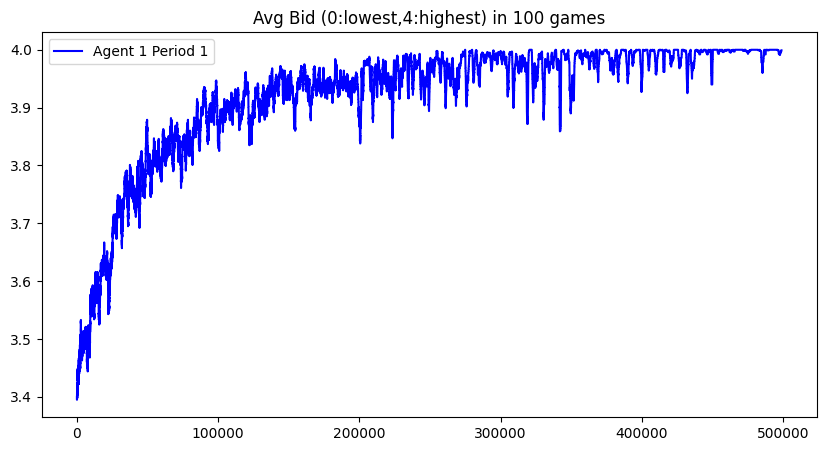

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams['font.size']=10
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
plt.plot(moving_average(np.array(winning_bid_history),1000), label = 'Agent 1 Period 1', c = 'b')
plt.title('Avg Bid (0:lowest,4:highest) in 100 games') 
plt.legend()
plt.show()